In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics.csv')

In [9]:
demographics

,user_id,user_archetype,age,sex,medical_speciality,grade,ai_familiarity,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,a,37.0,M,Pharmacist,8a,NaN,30s,Male,Pharmacist,Other,NaN
1,1,b,39.0,M,ID,NaN,NaN,30s,Male,Infectious Diseases,Other,NaN
2,2,a,38.0,m,ID / micro,ST6,2.0,30s,Male,Infectious Diseases,Other,Slightly familiar
3,3,b,37.0,Female,Infection,8b,1.0,30s,Female,Infectious Diseases,Other,Not familiar
4,4,a,38.0,Male,Respiratory,Consultant,2.0,30s,Male,Other,Consultant,Slightly familiar
5,5,b,45.0,male,ICU,Consultant,3.0,40s,Male,Other,Consultant,Moderately familiar
6,6,a,43.0,M,Pharmacy,Consultant,NaN,40s,Male,Pharmacist,Consultant,NaN
7,7,b,34.0,Female,ID Pharmacist,8a,3.0,30s,Female,Pharmacist,Other,Moderately familiar
8,8,a,37.0,Female,Pharmacy,8b,2.0,30s,Female,Pharmacist,Other,Slightly familiar
9,9,b,45.0,m,microbiology,cons,2.0,40s,Male,Microbiology,Consultant,Slightly familiar


In [3]:
# Age
demographics.age.mean()
demographics.age.std()

# Function to group the age values
def group_age(age):
    if age >= 20 and age < 30:
        return '20s'
    elif age >= 30 and age < 40:
        return '30s'
    elif age >= 40 and age < 50:
        return '40s'
    elif age >= 50 and age < 60:
        return '50s'
    elif age >= 60 and age < 70:
        return '60s'
    else:
        return 'nan'  # return the original value if it doesn't match the expected patterns

# Apply the standardization function
demographics['age_new'] = demographics['age'].apply(group_age)

42.80555555555556

8.762972243461835

In [4]:
# Sex
# Function to standardize the sex values
def standardize_sex(sex):
    sex = sex.strip().lower()  # Remove any leading/trailing whitespace and convert to lowercase
    if sex in ['m', 'male']:
        return 'Male'
    elif sex in ['f', 'female']:
        return 'Female'
    else:
        return sex  # return the original value if it doesn't match the expected patterns

# Apply the standardization function
demographics['sex_new'] = demographics['sex'].apply(standardize_sex)
demographics.sex_new.value_counts(normalize=False)
demographics.sex_new.value_counts(normalize=True)

sex_new
Male      21
Female    16
Name: count, dtype: int64

sex_new
Male      0.567568
Female    0.432432
Name: proportion, dtype: float64

In [5]:
# medical_speciality
# Function to standardize
def standardize_medical_speciality(medical_speciality):
    medical_speciality = medical_speciality.strip().lower()  # Remove any leading/trailing whitespace and convert to lowercase
    pharmacist_keywords = ['pharmacist', 'pharmacy']
    id_keywords = ['infection', 'id', 'infectious diseases']
    micro_keywords = ['microbiology', 'micro']
    
    if any(keyword in medical_speciality for keyword in pharmacist_keywords):
        return 'Pharmacist'
    elif any(keyword in medical_speciality for keyword in id_keywords):
        return 'Infectious Diseases'
    elif any(keyword in medical_speciality for keyword in micro_keywords):
        return 'Microbiology'
    else:
        return 'Other'
    
### Could add specific group for General Medicine? - Depends how many others I get ###

# Apply the standardization function
demographics['medical_speciality_new'] = demographics['medical_speciality'].apply(standardize_medical_speciality)
demographics.medical_speciality_new.value_counts(normalize=False)
demographics.medical_speciality_new.value_counts(normalize=True)

medical_speciality_new
Infectious Diseases    13
Microbiology           11
Other                   7
Pharmacist              6
Name: count, dtype: int64

medical_speciality_new
Infectious Diseases    0.351351
Microbiology           0.297297
Other                  0.189189
Pharmacist             0.162162
Name: proportion, dtype: float64

In [6]:
# grade
# Function to standardize

def standardize_grade(grade):
    if isinstance(grade, float):
        grade = 'Other'
    grade = grade.strip().lower()  # Remove any leading/trailing whitespace and convert to lowercase
    consultant_keywords = ['Consultant', 'cons']
    
    if any(keyword in grade for keyword in consultant_keywords):
        return 'Consultant'
    else:
        return 'Other'
    
### Could add specific group for General Medicine? - Depends how many others I get ###

# Apply the standardization function
demographics['grade_new'] = demographics['grade'].apply(standardize_grade)
demographics.grade_new.value_counts(normalize=False)
demographics.grade_new.value_counts(normalize=True)

grade_new
Consultant    23
Other         14
Name: count, dtype: int64

grade_new
Consultant    0.621622
Other         0.378378
Name: proportion, dtype: float64

In [7]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 37 non-null     int64  
 1   user_archetype          37 non-null     object 
 2   age                     36 non-null     float64
 3   sex                     37 non-null     object 
 4   medical_speciality      37 non-null     object 
 5   grade                   36 non-null     object 
 6   ai_familiarity          33 non-null     float64
 7   age_new                 37 non-null     object 
 8   sex_new                 37 non-null     object 
 9   medical_speciality_new  37 non-null     object 
 10  grade_new               37 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.3+ KB


37
ai_familiarity_new
Slightly familiar      14
Moderately familiar     9
Not familiar            7
Very familiar           3
Name: count, dtype: int64
ai_familiarity_new
Slightly familiar      0.424242
Moderately familiar    0.272727
Not familiar           0.212121
Very familiar          0.090909
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Percentage')

Text(0, 0.5, 'Familiarity with AI')

Text(0.5, 1.0, 'Respondents familiarity with AI')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Not familiar'),
  Text(1, 0, 'Slightly familiar'),
  Text(2, 0, 'Moderately familiar'),
  Text(3, 0, 'Very familiar'),
  Text(4, 0, 'Extremely familiar')])

(0.0, 100.0)

Text(0, 3, '21%')

Text(0, 3, '42%')

Text(0, 3, '27%')

Text(0, 3, '9%')

Text(0, 3, '0%')

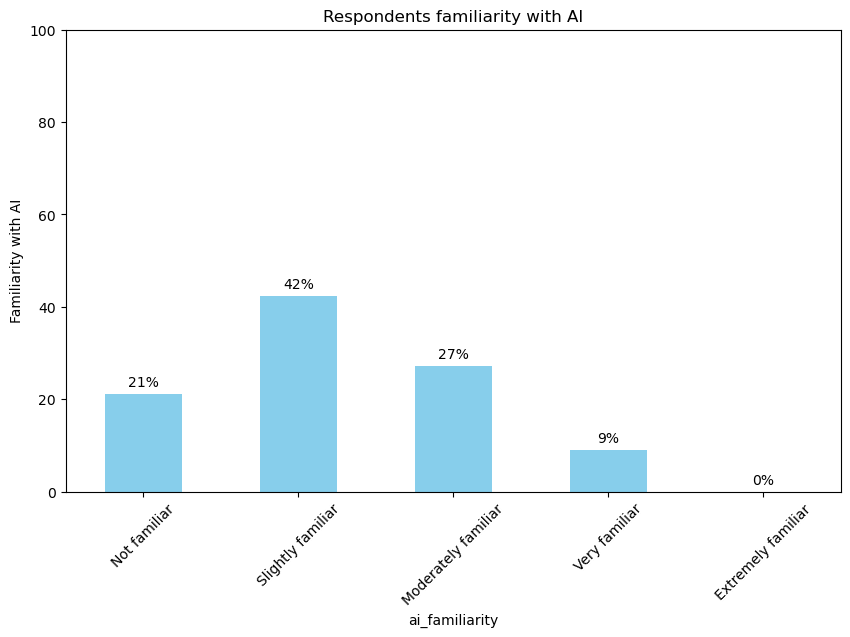

In [8]:
# ai_familiarity

# Create the Pandas Series
data = demographics.ai_familiarity
print(len(data))
# Define the mapping of numbers to labels
labels = {1: 'Not familiar', 2: 'Slightly familiar', 3: 'Moderately familiar', 4: 'Very familiar', 5: 'Extremely familiar'}

# Add new column 
demographics['ai_familiarity_new'] = demographics.ai_familiarity.map(labels)
print(demographics.ai_familiarity_new.value_counts(normalize=False))
print(demographics.ai_familiarity_new.value_counts(normalize=True))

# Map the data to the labels
data_labels = data.map(labels)

# Count the occurrences of each label and convert to percentages
label_counts = data_labels.value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage')
plt.ylabel('Familiarity with AI')
plt.title('Respondents familiarity with AI')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%

# Annotate bars with percentage values
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

In [10]:
demographics

,user_id,user_archetype,age,sex,medical_speciality,grade,ai_familiarity,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,a,37.0,M,Pharmacist,8a,NaN,30s,Male,Pharmacist,Other,NaN
1,1,b,39.0,M,ID,NaN,NaN,30s,Male,Infectious Diseases,Other,NaN
2,2,a,38.0,m,ID / micro,ST6,2.0,30s,Male,Infectious Diseases,Other,Slightly familiar
3,3,b,37.0,Female,Infection,8b,1.0,30s,Female,Infectious Diseases,Other,Not familiar
4,4,a,38.0,Male,Respiratory,Consultant,2.0,30s,Male,Other,Consultant,Slightly familiar
5,5,b,45.0,male,ICU,Consultant,3.0,40s,Male,Other,Consultant,Moderately familiar
6,6,a,43.0,M,Pharmacy,Consultant,NaN,40s,Male,Pharmacist,Consultant,NaN
7,7,b,34.0,Female,ID Pharmacist,8a,3.0,30s,Female,Pharmacist,Other,Moderately familiar
8,8,a,37.0,Female,Pharmacy,8b,2.0,30s,Female,Pharmacist,Other,Slightly familiar
9,9,b,45.0,m,microbiology,cons,2.0,40s,Male,Microbiology,Consultant,Slightly familiar


In [11]:
# Save
demographics.to_csv('demographics_processed.csv', index=False)